# dataset

In [65]:
# Standard library imports
from datetime import datetime, timedelta

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf

# Scikit-learn imports
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from scripts.get_top_stocks import *
top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

# specify variables for dataset generation
start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5


Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [16]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [17]:
df.to_csv("temp.csv",index=False)

In [18]:
df = pd.read_csv("temp.csv")
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
0,2023-02-24 13:30:00-05:00,139.759995,140.000000,138.210007,139.070007,139.070007,625490,0.994926,-0.098171,-0.219715,...,-0.218599,-0.217867,-0.212126,13.034631,0.458529,0.765332,0.789993,-1.09,1.001726,MRNA
1,2023-02-24 14:30:00-05:00,139.085007,140.250000,138.889999,139.309998,139.309998,464392,1.001726,-0.141268,-0.147812,...,-0.215925,-0.215798,-0.209988,13.253153,0.458530,0.769456,0.360001,-1.09,0.999856,MRNA
2,2023-02-24 15:30:00-05:00,139.304993,139.409897,138.744995,139.289993,139.289993,718841,0.999856,0.089995,0.215046,...,-0.214717,-0.215204,-0.209040,13.467115,0.458448,0.772803,-0.335098,-1.09,0.997918,MRNA
3,2023-02-27 09:30:00-05:00,139.520004,140.746002,136.720001,139.000000,139.000000,1420799,0.997918,0.217449,0.328073,...,-0.215031,-0.216113,-0.208673,13.678277,0.458257,0.767829,3.026001,0.31,0.995971,MRNA
4,2023-02-27 10:30:00-05:00,138.979996,139.880005,137.744995,138.440002,138.440002,801480,0.995971,-0.131968,-0.278686,...,-0.216863,-0.218572,-0.210724,13.891968,0.457624,0.773192,1.135010,0.31,0.996424,MRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90062,2024-07-31 10:30:00-04:00,417.600006,419.040009,414.929993,417.869995,417.869995,3671291,1.000647,-0.345522,-0.553322,...,-0.046947,-0.058911,-0.055200,12.923892,0.183062,0.986846,3.110016,0.68,0.994843,MSFT
90063,2024-07-31 11:30:00-04:00,417.859985,418.670013,415.489990,415.714996,415.714996,2805627,0.994843,-0.249882,-0.133654,...,-0.051480,-0.063718,-0.059892,12.967736,0.183121,0.986509,2.180023,0.68,1.003103,MSFT
90064,2024-07-31 12:30:00-04:00,415.709991,417.420013,413.859985,417.005005,417.005005,2934834,1.003103,-0.083811,0.022508,...,-0.048177,-0.060763,-0.056791,13.011033,0.183042,0.985874,2.560028,0.68,1.003465,MSFT
90065,2024-07-31 13:30:00-04:00,417.010010,420.119995,415.799988,418.450012,418.450012,3157645,1.003465,-0.004797,0.036571,...,-0.044545,-0.057470,-0.053276,13.043475,0.183256,0.989021,3.320007,0.68,0.994623,MSFT


In [19]:
# functions to add target column to df

def categorize_by_percentile(values,percentile_list,labels):
    # Compute percentiles
    percentiles = np.percentile(values, percentile_list)
    # Use pd.cut to bin the values
    categories = pd.cut(values, bins=[-np.inf] + percentiles.tolist() + [np.inf], labels=labels, include_lowest=True)
    
    return categories

def add_target_cols(df,percentile_list,labels):
    new_df = pd.DataFrame()
    
    for stock_name in df.stock_name.unique():
        stock_df = df[df['stock_name']==stock_name]
        stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)        
        label_mapping = {labels[i]:i for i in range(len(labels))}
        stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
        new_df = pd.concat([new_df,stock_df],ignore_index=True)
    
    return new_df

In [20]:
# create target column

# percentile_list = [20,40,60,80]
percentile_list = [33,66]
# labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
labels = ['sell', 'hold', 'buy']

df = add_target_cols(df,percentile_list,labels)

/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipykernel_19277/1988958013.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)
/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipykernel_19277/1988958013.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipyker

In [21]:
df.Target.value_counts()

Target
2    30622
0    29723
1    29722
Name: count, dtype: int64

In [22]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'buy')]))
print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'sell')]))
print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0
29723
0


In [46]:
# sort df according to date
df1 = df.sort_values("Datetime").reset_index(drop=True)
df1 = df1.drop(columns=['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'stock_name', 'Stock_Position'])
df1['Target'] = df1['Target'].astype('float64')
df1 = df1[(np.abs(stats.zscore(df1)) < 4).all(axis=1)]
df1['Target'] = df1['Target'].astype('category')
# df1
df1

,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,EMACloseDiff2,SMACloseDiff2,VWAP2,VolatilityStdDev2,Volatility2,Momentum2,EMAVolumeDiff4,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,Target
0,0.996763,-0.317099,-0.373950,-0.001928,-0.001621,-0.002226,0.351568,0.052118,0.995351,-0.389293,...,0.037262,0.036518,0.036248,8.455857,0.277810,1.214960,-0.300003,0.11,1.001731,2.0
1,0.999342,-0.007519,0.045017,-0.001185,-0.000329,-0.000314,0.049497,0.104425,0.995037,0.016327,...,-0.003154,-0.003441,-0.000065,3.536935,0.258773,1.079980,-0.559998,0.11,1.004611,2.0
2,1.003396,-0.156986,-0.213034,0.000952,0.001695,0.002057,3.889087,0.079509,1.004016,-0.208848,...,0.086784,0.086025,0.075666,103.707355,0.234565,1.197053,9.500000,0.11,1.001538,2.0
3,1.004611,-0.154064,-0.210965,0.001138,0.002300,0.002787,0.346486,0.150795,1.003950,-0.234333,...,0.001431,0.000877,0.003257,3.506023,0.258244,1.076210,-0.149994,0.11,1.005245,2.0
4,1.001538,0.022851,0.119499,0.000829,0.000769,0.000677,1.767767,0.053163,1.004940,0.003531,...,0.087708,0.086947,0.076966,103.694402,0.234387,1.193619,12.017212,0.11,0.998464,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90061,1.000881,0.048838,0.093759,-0.000366,0.000440,0.000399,0.141430,0.201747,0.994706,-0.002567,...,-0.001258,0.021678,0.024377,7.470908,0.236452,1.056067,0.644989,0.68,0.999164,1.0
90062,1.001808,0.167522,0.338659,0.000790,0.000903,0.000597,0.413651,0.009861,1.003964,0.211749,...,-0.001475,-0.007912,-0.007099,11.093681,0.274331,1.096244,1.784393,0.68,1.001280,1.0
90063,1.005786,0.177212,0.304079,0.002371,0.002885,0.002006,1.039448,0.103501,1.007968,0.237594,...,-0.015786,0.048500,0.054429,14.275903,0.397293,1.110667,5.047607,0.68,0.987633,0.0
90064,1.003365,0.181790,0.237755,0.001175,0.001680,0.001280,1.060660,0.070606,1.004267,0.410566,...,-0.004623,-0.012541,-0.010390,9.891713,0.244807,0.947111,3.000000,0.68,1.004025,2.0


In [47]:
df1.describe()

,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,EMACloseDiff2,SMACloseDiff2,VWAP2,VolatilityStdDev2,Volatility2,Momentum2,EMAVolumeDiff4,...,SMAVolumeDiff256,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift
count,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000,...,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000,80060.000000
mean,1.000162,-0.036079,0.000964,0.000068,0.000069,0.000069,0.907312,0.205678,1.000369,-0.053394,...,-0.104080,0.027446,0.027358,0.025526,14.119460,0.362230,1.068935,1.510421,0.135263,1.000174
std,0.006901,0.171919,0.263461,0.002461,0.003450,0.003174,1.490495,0.208935,0.010206,0.302004,...,0.584060,0.066260,0.077048,0.072332,16.352926,0.132824,0.147910,3.199584,0.771169,0.007304
min,0.961768,-0.849450,-0.926240,-0.013689,-0.019489,-0.015283,0.000000,0.000000,0.944941,-0.925068,...,-0.959705,-0.279791,-0.323647,-0.256112,0.513079,0.132825,0.571536,-0.947498,-2.160000,0.960903
25%,0.996976,-0.154868,-0.173141,-0.001087,-0.001514,-0.001468,0.152028,0.063109,0.995415,-0.270556,...,-0.491453,-0.013803,-0.020413,-0.020468,4.705909,0.267473,0.975400,-0.250000,-0.330000,0.996950
50%,1.000156,-0.041381,-0.014612,0.000087,0.000078,0.000050,0.406595,0.141286,1.000360,-0.113046,...,-0.268238,0.027834,0.026178,0.025398,8.811104,0.339779,1.057520,0.436302,0.150000,1.000160
75%,1.003307,0.087041,0.157721,0.001233,0.001651,0.001607,0.989924,0.273002,1.005263,0.131806,...,0.100166,0.067495,0.071862,0.069838,15.928210,0.427241,1.146889,1.809998,0.680000,1.003369
max,1.039677,0.460769,1.000000,0.013566,0.019453,0.015587,15.471414,1.519241,1.056476,1.098834,...,4.384582,0.304977,0.389128,0.352312,125.069199,0.980820,1.819192,27.694946,2.180000,1.039677


In [114]:
# train test split on index
train_size, val_size, test_size = 0.8, 0.1, 0.1
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape,val_df.shape,test_df.shape

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

In [15]:
test_df.Target.value_counts()

Target
0    3087
2    3016
1    2905
Name: count, dtype: int64

In [16]:
df.columns, df.columns[8:-4]

(Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
        'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
        'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
        'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
        'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
        'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
        'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
        'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
        'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
        'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
        'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
        'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
        'Momentum64', 'EMAVolumeDiff1

In [72]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(72053, 72) (72053,)
(9006, 72) (9006,)
(9008, 72) (9008,)


In [73]:
ddf = pd.DataFrame(y_test, columns=['target'])
ddf.groupby(['target'])['target'].count()

target
0    3087
1    2905
2    3016
Name: target, dtype: int64

In [74]:
ddf = pd.DataFrame(y_train, columns=['target'])
ddf.groupby(['target'])['target'].count()

target
0    23758
1    23615
2    24680
Name: target, dtype: int64

In [75]:
# check number of classes in target is correct

set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [82]:
# standardise the values and PCA
# from scripts.train_predict import *

# # standardise the values and selectKbest
# scaler = StandardScaler()
# pca = PCA(n_components = 0.95)

# # Fit the scaler on the training data and transform the training data
# X_train = scaler.fit_transform(X_train)
# X_train = pca.fit_transform(X_train)

# # Transform the validation data
# X_val = scaler.transform(X_val)
# X_val = pca.transform(X_val)

# # Transform the test data
# X_test = scaler.transform(X_test)
# X_test = pca.transform(X_test)

# X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

# standardise the values and selectKbest
from scripts.train_predict import *

scaler = StandardScaler()
# selector = SelectKBest(k=10)
pca = PCA(n_components = 0.99)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
# X_train = selector.fit_transform(X_train, y_train)
# X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
# X_val = selector.transform(X_val)
# X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
# X_test = selector.transform(X_test)
# X_test = pca.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((72053, 72), (72053,), (9006, 72), (9006,), (9008, 72), (9008,))

In [84]:
X_train

array([[ 0.16203102,  0.15662218, -0.37605985, ..., -0.00216748,
        -0.00681688,  0.05673017],
       [-1.36200546, -1.27145162, -0.58974159, ..., -0.0051714 ,
        -0.01005028,  0.05673017],
       [-0.57378514, -0.72296191,  0.23840587, ..., -0.02549968,
         0.13644696,  0.05673017],
       ...,
       [ 0.11447138,  0.1320227 , -0.23556469, ...,  0.00590782,
        -0.0035593 , -0.87549113],
       [-0.32543011, -0.0963104 ,  0.72200212, ..., -0.02335651,
        -0.00890172, -0.87549113],
       [ 0.13080457,  0.00358459,  0.1947238 , ...,  0.0025476 ,
        -0.00288215, -0.87549113]])

In [102]:
# sample check

X_train[100],y_train[100]

(array([ 2.93499191e-01,  1.52076288e-01, -9.59256714e-01, -1.00869674e+00,
        -1.21259228e+00, -1.55740383e-01,  6.31556044e-02, -7.95341189e-01,
         1.01205503e-01,  3.06715239e-02, -6.61514262e-01, -8.62178307e-01,
        -1.11267807e+00, -3.40160986e-01, -7.92786775e-02,  1.14922442e-01,
        -8.02804298e-02, -1.90428210e-01, -1.17574892e-01, -2.84131535e-01,
        -1.88867585e-01, -3.73491772e-01, -2.01324740e-01,  5.35487870e-01,
        -7.34025405e-02, -2.92013805e-01,  4.12730193e-01,  4.58625538e-01,
         6.20948187e-01, -3.13639983e-01, -4.13778141e-01,  5.52276838e-01,
         1.11669819e-01,  2.99301903e-01,  6.63656603e-01,  7.55424265e-01,
         7.20982964e-01, -3.75658987e-01, -6.17204500e-01,  5.58063820e-01,
         1.91839204e-01, -5.08628136e-03,  6.21868536e-01,  6.21016812e-01,
         7.76745318e-01, -4.87927321e-01, -7.48956434e-01,  5.41744921e-01,
         1.43967396e-02,  3.43786566e-02,  4.30583121e-01,  4.29228406e-01,
         5.3

In [103]:
# check distribution of target

print(train_df.Target.value_counts())
print(val_df.Target.value_counts())
print(test_df.Target.value_counts())

Target
2    24680
0    23758
1    23615
Name: count, dtype: int64
Target
1    3202
2    2926
0    2878
Name: count, dtype: int64
Target
0    3087
2    3016
1    2905
Name: count, dtype: int64


# model

In [66]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import ParameterGrid
# from tqdm import tqdm
from alive_progress import alive_it

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    param_grid = {
        'hidden_layer_sizes': [(8),(16),(32),(8,16),(8,32),(32,16),(32,8)], # Different architectures
        'activation': ['tanh'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = accuracy_score(y_val, y_pred)
        
        if best_score > score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy score: {round(score,5)}")
    
    return y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    y_pred = predict(best_model, X_test, y_test)
    acc = accuracy_score(y_test, y_pred)
    
    return best_model, best_params, best_score, acc, y_pred
    

In [67]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.406695
on 1: score: 0.403947
on 2: score: 0.3995753
on 5: score: 0.3930802
|████████████████████████████████████████| 7/7 [100%] in 1:26.7 (0.08/s) 
Best parameters found: {'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': (32, 16), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.39308
Test set accuracy score: 0.35723


In [68]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0.0: 1185, 1.0: 2859, 2.0: 3962}

accuracy: 35.72


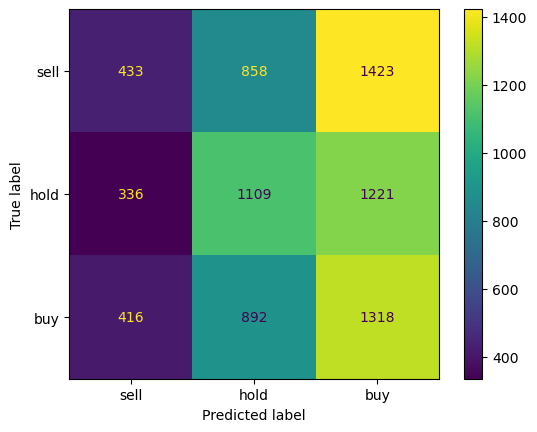

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [70]:
X_test.shape

(8006, 66)

In [71]:
## predict on indiv stocks

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    # if use selectKbest
    # stock_X_test = selector.transform(stock_X_test)
    # if use PCA
    # stock_X_test = pca.transform(stock_X_test)

    stock_y_test = stock_df[target].to_numpy()

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

# choose top 10 from here

AttributeError: 'DataFrame' object has no attribute 'stock_name'